In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
df = pd.read_csv("londonWeather.csv")
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [4]:
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')


Max temp, min temp, sunshine in 2020

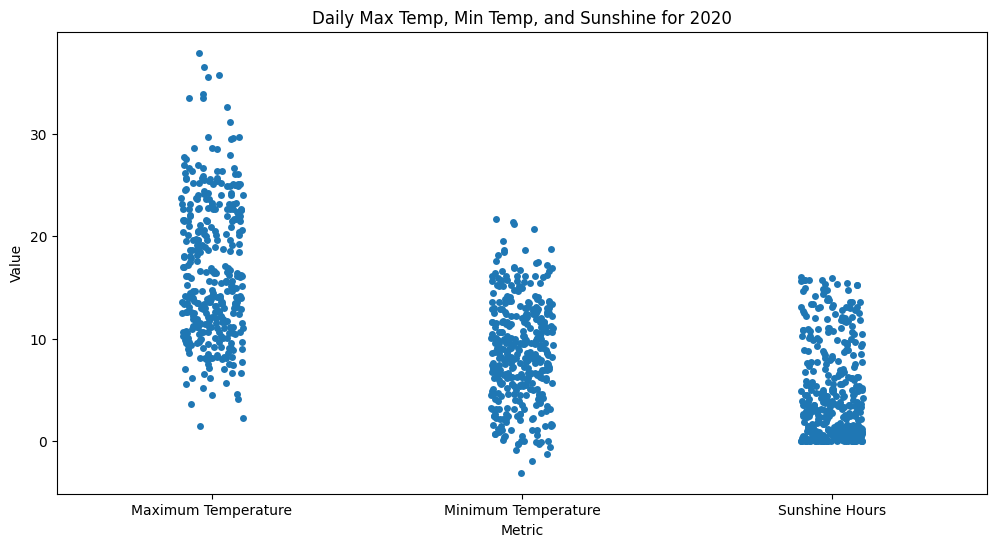

In [5]:
df_2020 = df[df['date'].dt.year == 2020]

df_2020_long = pd.melt(df_2020, id_vars=['date'], value_vars=['max_temp', 'min_temp', 'sunshine'], 
                       var_name='Metric', value_name='Value')

df_2020_long['Metric'] = df_2020_long['Metric'].replace({
    'max_temp': 'Maximum Temperature',
    'min_temp': 'Minimum Temperature',
    'sunshine': 'Sunshine Hours'
})

plt.figure(figsize=(12, 6))
sns.stripplot(x='Metric', y='Value', data=df_2020_long, jitter=True)
plt.title('Daily Max Temp, Min Temp, and Sunshine for 2020')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use st

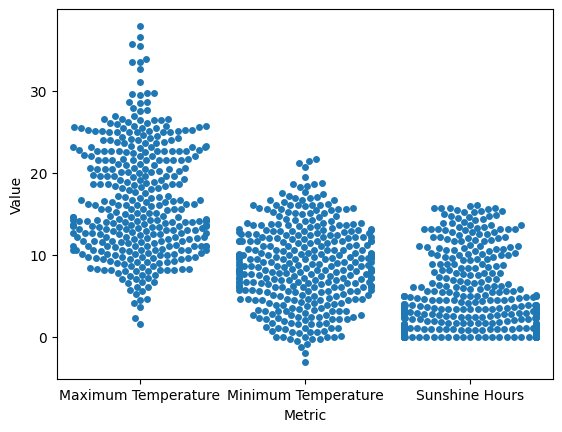

In [6]:
sns.swarmplot(data=df_2020_long,y="Value", x ="Metric")
plt.show()

Max, Mean, Min temperature for 2020 in london

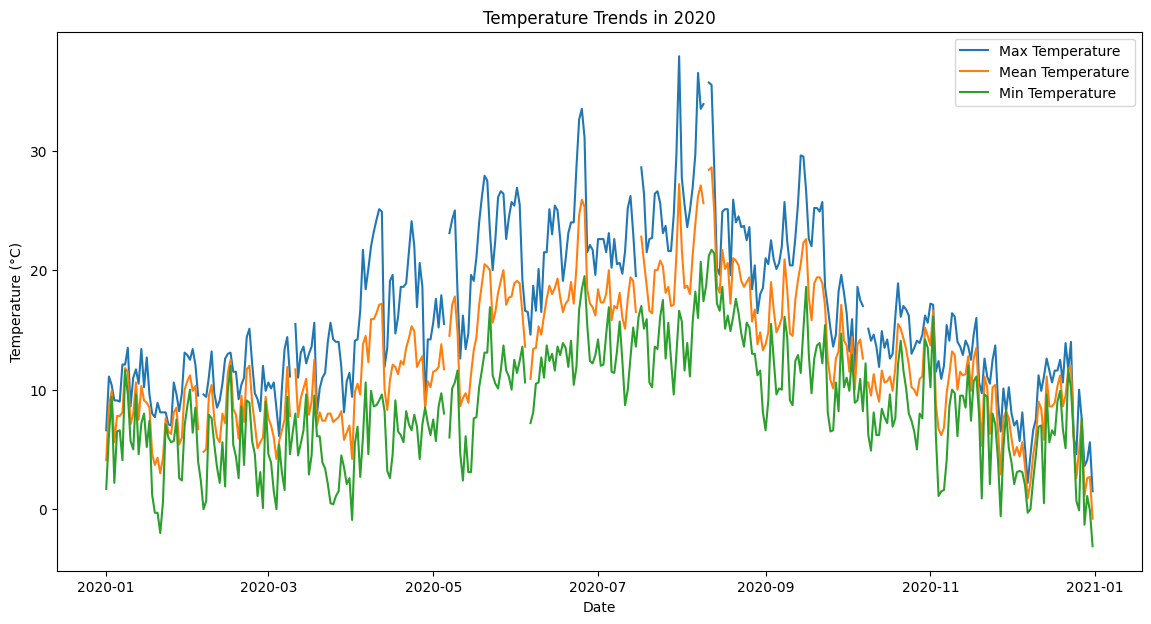

In [12]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

df_2020 = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2020-12-31')]

plt.figure(figsize=(14, 7))
plt.plot(df_2020['date'], df_2020['max_temp'], label='Max Temperature')
plt.plot(df_2020['date'], df_2020['mean_temp'], label='Mean Temperature')
plt.plot(df_2020['date'], df_2020['min_temp'], label='Min Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends in 2020')
plt.legend()
plt.show()



Max, Min, Mean temperature, Precipation rate and sunshine in hours for monthly report

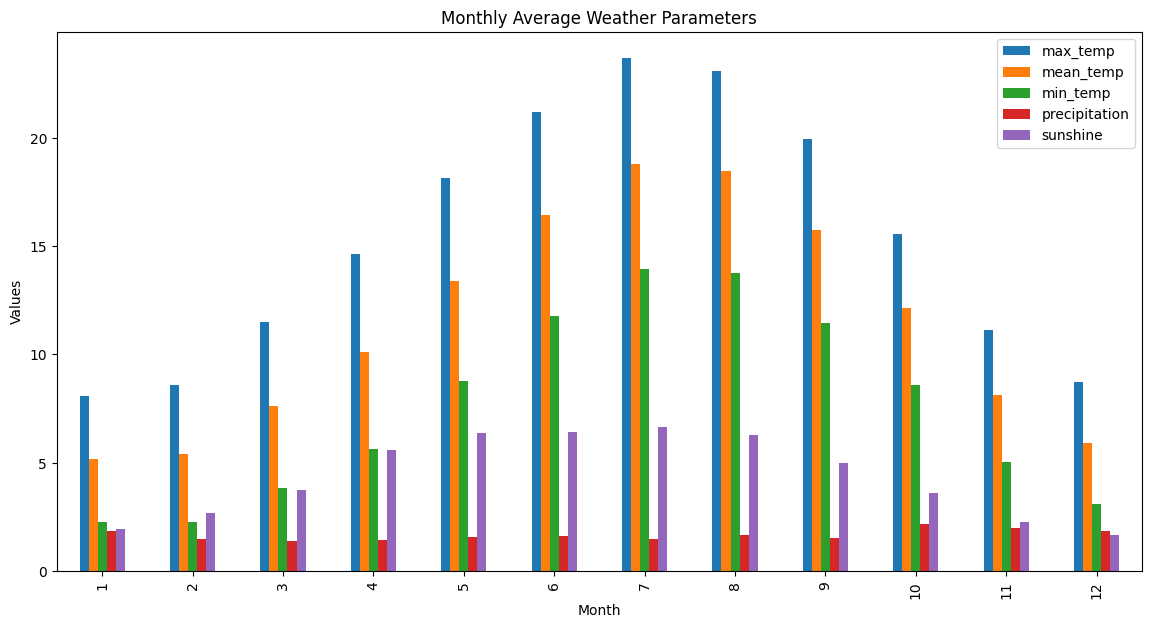

In [8]:
df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')[['max_temp', 'mean_temp', 'min_temp', 'precipitation', 'sunshine']].mean()

monthly_avg.plot(kind='bar', figsize=(14, 7))
plt.title('Monthly Weather Parameters')
plt.xlabel('Month')
plt.ylabel('Values')
plt.show()


Heatmap for different weather conditions

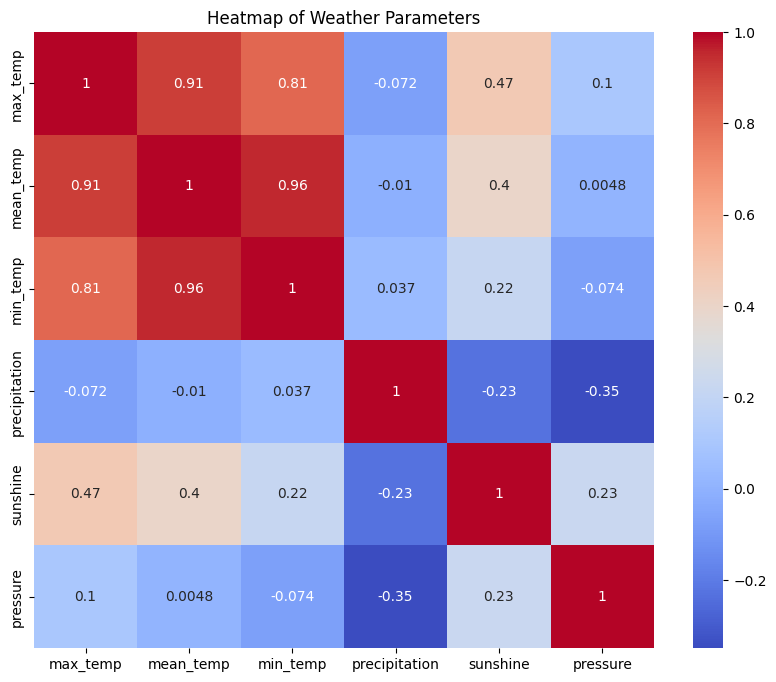

In [13]:
corr = df[['max_temp', 'mean_temp', 'min_temp', 'precipitation', 'sunshine', 'pressure']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Weather Parameters')
plt.show()


Comparision between precipitation and snow 

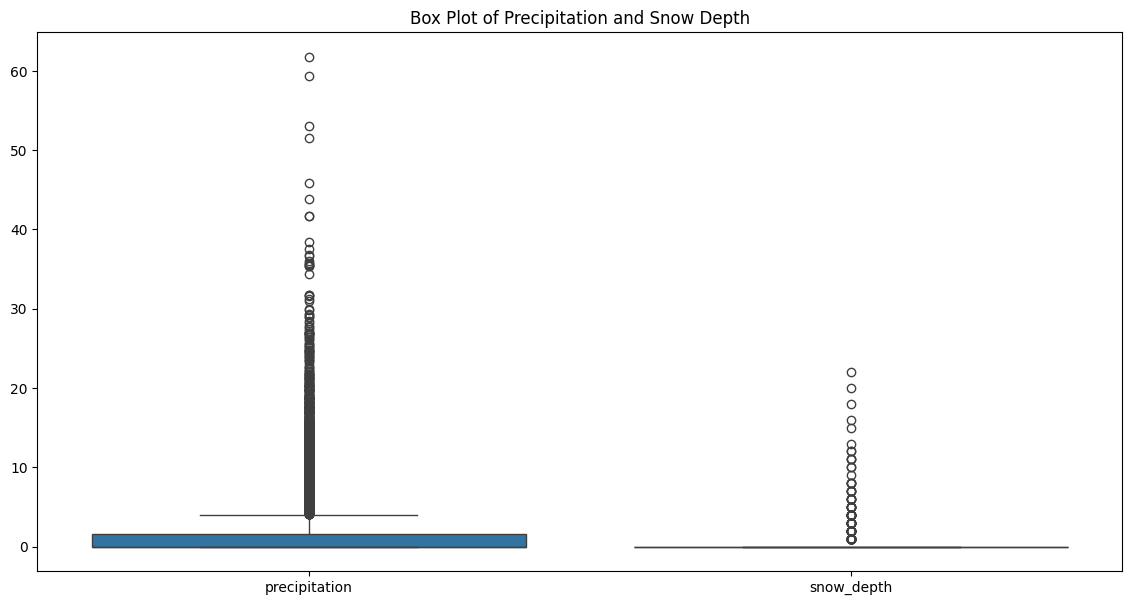

In [14]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['precipitation', 'snow_depth']])
plt.title('Box Plot of Precipitation and Snow Depth')
plt.show()


As it is clear from the graph that Rain is more than snow in london

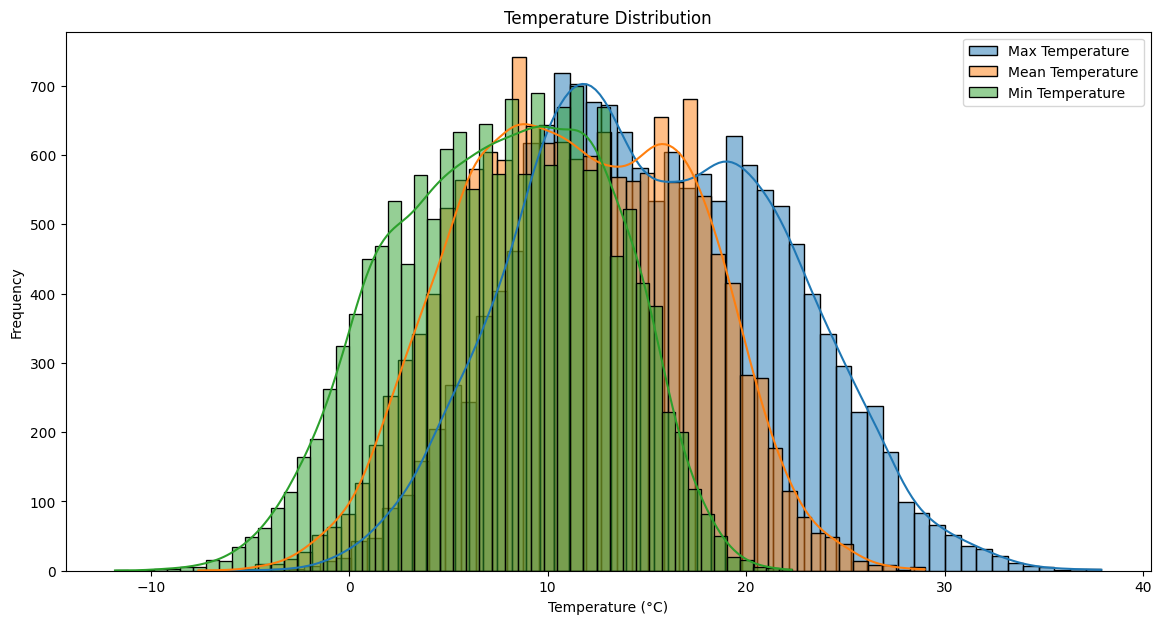

In [15]:
plt.figure(figsize=(14, 7))
sns.histplot(df['max_temp'], kde=True, label='Max Temperature')
sns.histplot(df['mean_temp'], kde=True, label='Mean Temperature')
sns.histplot(df['min_temp'], kde=True, label='Min Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.legend()
plt.show()


The maximum temperatures (blue) have a wider distribution and higher values, peaking around 20°C. Mean temperatures (orange) and minimum temperatures (green) follow a normal distribution, with the mean peaking around 10°C and the minimum around 0°C, indicating the variation in daily temperatures over the years.





